In [1]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

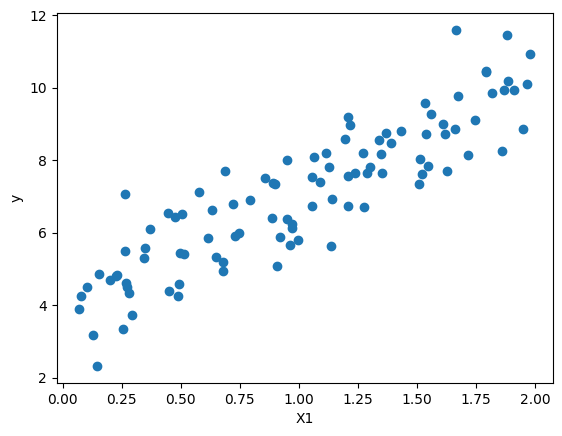

In [2]:
import matplotlib.pyplot as plt
plt.scatter(X, y)
plt.ylabel("y")
plt.xlabel("X1")
plt.show()

In [3]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [4]:
theta_best

array([[3.86822778],
       [3.17258463]])

In [5]:
X_new = np.array([[0], [2]])
print("X_new = ", X_new)
X_new_b = np.c_[np.ones((2, 1)), X_new]
print("X_new_b = ", X_new_b)
y_predict = X_new_b.dot(theta_best)
y_predict

X_new =  [[0]
 [2]]
X_new_b =  [[1. 0.]
 [1. 2.]]


array([[ 3.86822778],
       [10.21339705]])

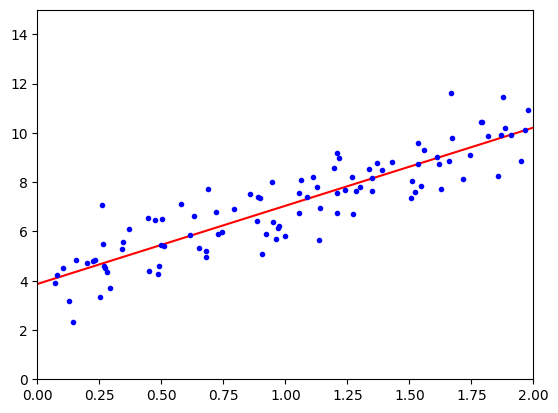

In [6]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [7]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(lin_reg.intercept_, lin_reg.coef_)
print(lin_reg.predict(X_new))

[3.86822778] [[3.17258463]]
[[ 3.86822778]
 [10.21339705]]


In [8]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[3.86822778],
       [3.17258463]])

In [9]:
eta = 0.1
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    
theta

array([[3.86822778],
       [3.17258463]])

In [10]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        
theta

array([[3.90197555],
       [3.17929017]])

In [11]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())
sgd_reg.intercept_, sgd_reg.coef_

(array([3.85908837]), array([3.1913834]))

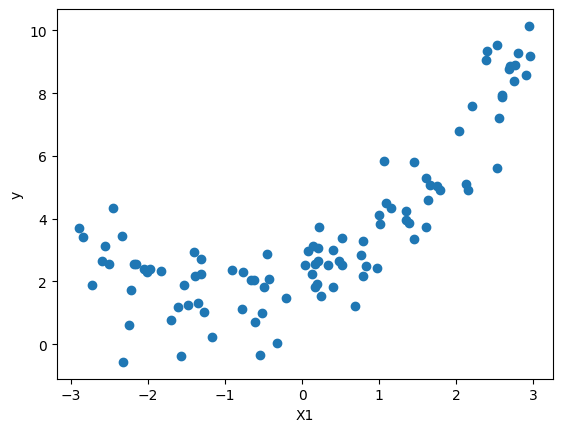

In [12]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)
plt.scatter(X, y)
plt.ylabel("y")
plt.xlabel("X1")
plt.show()

In [13]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
print(X[0])
print(X_poly[0])
Xper = X
yPer = y

[-2.89062594]
[-2.89062594  8.3557183 ]


In [14]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
print(lin_reg.intercept_)
print(lin_reg.coef_)

[2.00495586]
[[1.03729999 0.50468343]]


[2.00495586] 1.0372999945571042 0.5046834280083932


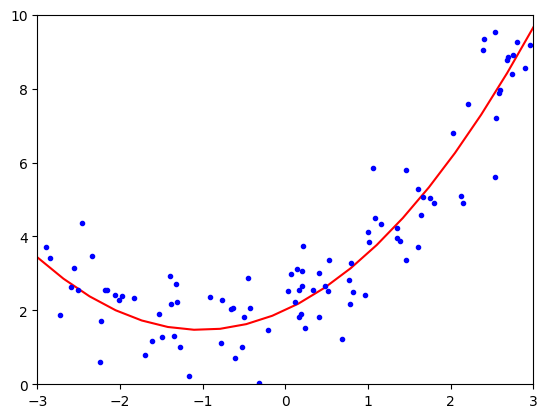

In [15]:
theta0 = lin_reg.intercept_
theta1, theta2 = lin_reg.coef_[0]
print(theta0, theta1, theta2)
x_coordinates = np.linspace(-3, 3, 20)

y_coordinates = []
for x in x_coordinates:
  y = theta0 + theta1 * x + theta2 * x ** 2
  y_coordinates.append(y)


plt.plot(x_coordinates, y_coordinates, "r-")
plt.plot(Xper, yPer, "b.")
plt.axis([-3, 3, 0, 10])
plt.show()

In [16]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2) 
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.axis([0, 80, 0, 3])
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

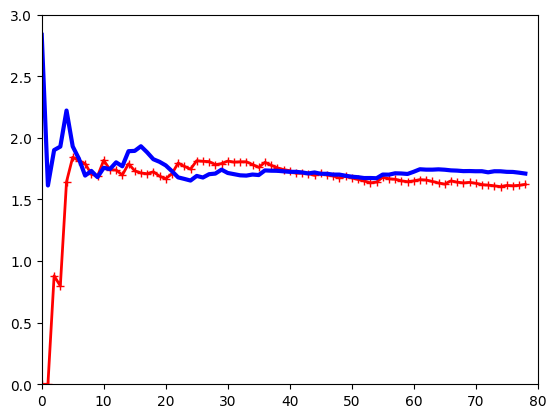

In [17]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, Xper, yPer)

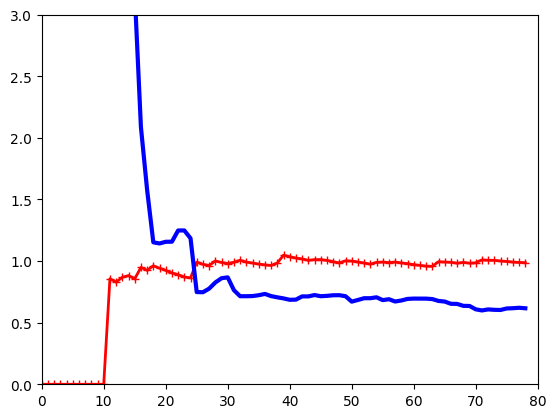

In [18]:
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression()),
    ])
plot_learning_curves(polynomial_regression, Xper, yPer)

In [19]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(Xper, yPer)
ridge_reg.predict([[1.5]])

array([[5.16569871]])

In [20]:
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(Xper, yPer.ravel())
sgd_reg.predict([[1.5]])

array([5.16386953])

In [21]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(Xper, yPer)
lasso_reg.predict([[1.5]])

array([5.12413756])

In [22]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(Xper, yPer)
elastic_net.predict([[1.5]])

array([5.12139889])

In [23]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [25]:
X = iris["data"][:, 3:]
y = (iris["target"] == 2).astype(int)

In [26]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

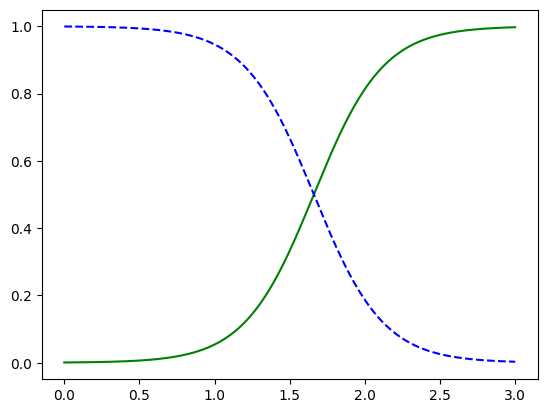

In [28]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="not Iris-Virginica")

In [29]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

In [30]:
X = iris["data"][:, (2, 3)]
y = iris["target"]
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial')

In [31]:
softmax_reg.predict([[5, 2]])

array([2])

In [32]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])